#### Autor: Iury Coelho

##### Considerações Iniciais

Pretende-se calcular características de áudio e analisar o quanto eles são similares ao mesmo tempo testar funções que podem estimar o pitch de forma eficaz. 

##### Propósito:
>__Calculando a similaridade entre dois vetores__:
* Estamos interessados em medir a similaridade entre dois áudio. 
* Os áudios podem ter uma respresentação vetorial
* a similaridade de cossenos pode ser uma medida eficaz para midir similaridade entre dois vetores

>__Medir o Pitch__:
*  Existem diversas maneiras de estimar o pitch, de acordo com a pesquisa constatou-se que o algoritmo de Praat é o mais preciso [1]. A biblioteca Parselmouth é capaz de chamar funções Praat em Python [2]
* [1]: Strömbergsson, Sofia. "Today's Most Frequently Used F0 Estimation Methods, and Their Accuracy in Estimating Male and Female Pitch in Clean Speech." INTERSPEECH. 2016.https://pdfs.semanticscholar.org/ff04/0316f44eab5c0497cec280bfb1fd0e7c0e85.pdf
* [2]: https://github.com/YannickJadoul/Parselmouth


>__funções implementadas/propósito__:
*  audio_infor / extrair informações básicas de um sinal de áudio
*  zero_crossing / calcular a taxa de cruzamento de zero de uma série temporal de áudio
*  cosine_similarity / calcula a similaridade de cossenos entre dois vetores
*  infor_pich / mostra informações de pitch
*  draw_pitch_espec / desenhar o espectograma juntamente com o pitch
*  draw_intensity_espec/ desenhar o espectograma juntamente com a intensidade



In [119]:
%matplotlib inline  
import librosa
import librosa.display
import IPython
import numpy as np
import pandas as pd
import scipy
import math 
import matplotlib.pyplot as plt
import parselmouth
import seaborn as sns


audio1="audio/ale-f1-l1.wav"
audio2="audio/tri-f1-q1.wav"



In [120]:
def audio_infor(audio, nome, sentimento, genero):
    """ 
    Função para extrair informações básicas de audios: 
    duração do áudio, taxa de amostragem, amostras totais
        parâmetros
            audio: caminho do arquivo de audio ou url
            nome: nome do audio 
            sentimento: sentimento que o audio exprime
            genero: genero da voz do audio, masculino ou feminino
    
    """  
    y,sr=librosa.load(audio)
    print ('VISÃO GERAL DO AUDIO:'+nome)    
    print ('Genero da voz:'+ genero)
    print('Sentimento:'+ sentimento)
    secs=np.size(y)/sr
    print('Duração do áudio: '+str(secs)+' s')
    print('Taxa de amostragem de áudio: '+str(sr)+' samples/sec')
    print('Amostras Totais: '+str(np.size(y)))
    print('\n')
    return IPython.display.Audio(audio)


def zero_crossing_rate(audio):
    """
      calcula o zero corssing de uma amostra de audio         
    """ 
    y,sr=librosa.load(audio)
    return librosa.feature.zero_crossing_rate(y)



def cosine_similarity(v1,v2):
    "compute cosine similarity of v1 to v2: (v1 dot v2)/{||v1||*||v2||)"
    sumxx, sumxy, sumyy = 0, 0, 0
    for i in range(len(v1)):
        x = v1[i]; y = v2[i]
        sumxx += x*x
        sumyy += y*y
        sumxy += x*y
    return sumxy/math.sqrt(sumxx*sumyy)

In [121]:
## funções retiradas da documentação da biblioteca Parselmouth
## esse conjunto de funções tem o proposito de desenhar o espectrograma e o p

def draw_spectrogram(spectrogram, dynamic_range=70):
    X, Y = spectrogram.x_grid(), spectrogram.y_grid()
    sg_db = 10 * np.log10(spectrogram.values)
    plt.pcolormesh(X, Y, sg_db, vmin=sg_db.max() - dynamic_range, cmap='afmhot')
    plt.ylim([spectrogram.ymin, spectrogram.ymax])
    plt.xlabel("time [s]")
    plt.ylabel("frequency [Hz]")


def draw_pitch(pitch):
    # Extract selected pitch contour, and
    # replace unvoiced samples by NaN to not plot
    pitch_values = pitch.selected_array['frequency']
    pitch_values[pitch_values==0] = np.nan
    plt.plot(pitch.xs(), pitch_values, 'o', markersize=5, color='w')
    plt.plot(pitch.xs(), pitch_values, 'o', markersize=2)
    plt.grid(False)
    plt.ylim(0, pitch.ceiling)
    plt.ylabel("fundamental frequency [Hz]")
    
def draw_intensity(intensity):
    plt.plot(intensity.xs(), intensity.values.T, linewidth=3, color='w')
    plt.plot(intensity.xs(), intensity.values.T, linewidth=1)
    plt.grid(False)
    plt.ylim(0)
    plt.ylabel("intensity [dB]")




In [122]:
## função construida para análises de amostras

def infor_pitch(audio):
    snd = parselmouth.Sound(audio)
    pitch = snd.to_pitch()
    return pitch

def draw_pitch_espec(audio):
    """
    função para cauluar o spectograma e desenhar o pitch
    
    """
    snd = parselmouth.Sound(audio)
    pitch = snd.to_pitch()
    # If desired, pre-emphasize the sound fragment before calculating the spectrogram
    pre_emphasized_snd = snd.copy()
    pre_emphasized_snd.pre_emphasize()
    spectrogram = pre_emphasized_snd.to_spectrogram(window_length=0.03, maximum_frequency=8000)   
    plt.figure()
    
    draw_spectrogram(spectrogram)
    plt.twinx()
    
    draw_pitch(pitch)
    plt.xlim([snd.xmin, snd.xmax]) 
    plt.show()

def draw_intensity_espec(audio):
    """
    função para cauluar o spectograma e desenhar a intensidade sobre ele
    
    """
    snd = parselmouth.Sound(audio)
    intensity = snd.to_intensity()
    spectrogram = snd.to_spectrogram()
    plt.figure()
    
    draw_spectrogram(spectrogram)
    plt.twinx()
    
    draw_intensity(intensity)
    plt.xlim([snd.xmin, snd.xmax])
    plt.show()

   

In [123]:
#informações de pitch de uma amostra
infor_audio1 = infor_pitch(audio1)
print (infor_audio1)

Object type: Pitch
Object name: <no name>
Date: Wed May 12 17:51:23 2021

Time domain:
   Start time: 0 seconds
   End time: 2.4516099773242632 seconds
   Total duration: 2.4516099773242632 seconds
Time sampling:
   Number of frames: 242 (183 voiced)
   Time step: 0.01 seconds
   First frame centred at: 0.020804988662131648 seconds
Ceiling at: 600 Hz

Estimated quantiles:
   10% = 201.752226 Hz = 171.868678 Mel = 12.1510151 semitones above 100 Hz = 5.40010495 ERB
   16% = 205.717091 Hz = 174.761845 Mel = 12.4879399 semitones above 100 Hz = 5.48300252 ERB
   50% = 257.504538 Hz = 211.216718 Mel = 16.3751743 semitones above 100 Hz = 6.50913291 ERB
   84% = 309.163236 Hz = 245.322361 Mel = 19.5404253 semitones above 100 Hz = 7.44042942 ERB
   90% = 322.30608 Hz = 253.672151 Mel = 20.2611769 semitones above 100 Hz = 7.66451379 ERB
Estimated spreading:
   84%-median = 51.8 Hz = 34.2 Mel = 3.174 semitones = 0.9339 ERB
   median-16% = 51.93 Hz = 36.55 Mel = 3.898 semitones = 1.029 ERB
   90%-

In [124]:
#Calculando a similaridade entre dois sinais de audio tomando como parâmetro o zero_crossing_rate

vetor1 = zero_crossing_rate(audio1)
array1 = vetor1[0]

vetor2 = zero_crossing_rate(audio2)
array2 = vetor2[0]

print("o valor de similaridade entre os dois vetores é:",cosine_similarity(v1,v2))



o valor de similaridade entre os dois vetores é: 0.6957161466891667


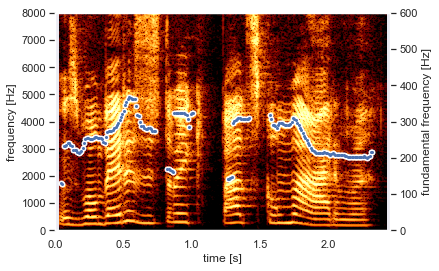

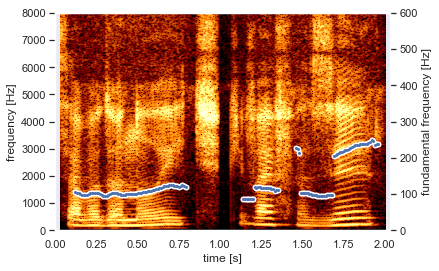

In [125]:
# analizando o espectograma e o pitch
draw_pitch_espec(audio1)
draw_pitch_espec(audio2)

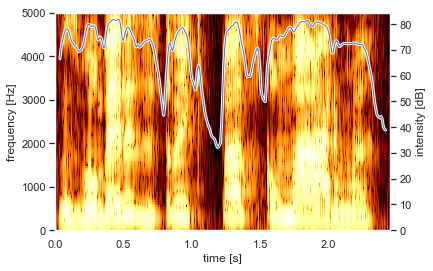

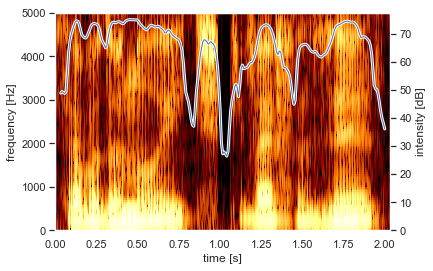

In [126]:
# analizando o espectograma e a intensidade
draw_intensity_espec(audio1)
draw_intensity_espec(audio2)